In [83]:
A = [1, 2, 3, 8, 10]
B = [5, 6, 7, 9]
C = []
b_j = 0
for i in range(len(A)):
#     if b_j == len(B) - 1:
#         C.append(A[i])
#         #print(b_j)
#         continue
    for j in range(b_j, len(B)):
        if A[i] < B[j]:
            C.append(A[i])
            print(C)
            break
        else:
            C.append(B[j])
            b_j = j + 1
            print(C)
            continue
    if b_j == len(B):
        C += 
print(C)

[1]
[1, 2]
[1, 2, 3]
[1, 2, 3, 5]
[1, 2, 3, 5, 6]
[1, 2, 3, 5, 6, 7]
[1, 2, 3, 5, 6, 7, 8]
[1, 2, 3, 5, 6, 7, 8, 9]
[1, 2, 3, 5, 6, 7, 8, 9]


In [58]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model

# import some data to play with
iris = datasets.load_iris()

In [56]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [61]:
logis = linear_model.LogisticRegression()

In [62]:
logis.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Automatically created module for IPython interactive environment
classif_rate for L1 logistic : 76.666667 
classif_rate for Naive bayes : 78.000000 


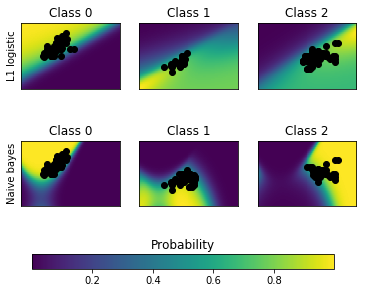

In [65]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 1.0
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers. The logistic regression cannot do
# multiclass out of the box.
classifiers = {'L1 logistic': LogisticRegression(),
               'Naive bayes': GaussianNB()
               }

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
    print("classif_rate for %s : %f " % (name, classif_rate))

    # View probabilities=
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()